 # Что такое машинное обучение?

**Лектор:** Тришин Владимир Евгеньевич, ООО Инфорион

**Telegram:** @trishin_v </br>
**Mail:** v.trishin@inforion.ru

In [1]:
from prelude import *

## Оптимизация

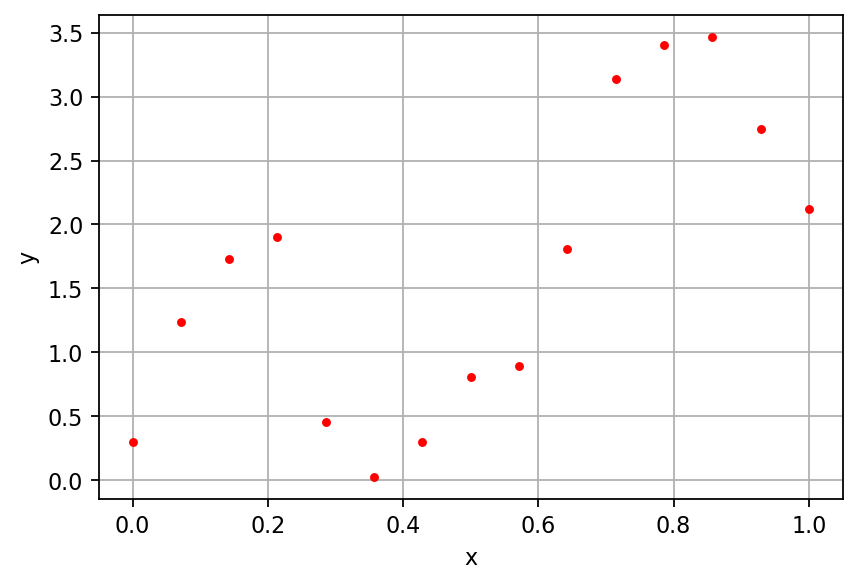

In [2]:
x, y = random_points(size=15)

plt.plot(x, y, '.', c='r')
plt.xlabel('x'); plt.ylabel('y');

$$
f_k(x) = \sum k_i x^i
$$

$$
loss = \sum (f_k(x)-y)^2
$$

$$
k^* = \underset{k}{argmin} \sum (f_k(x)-y)^2
$$

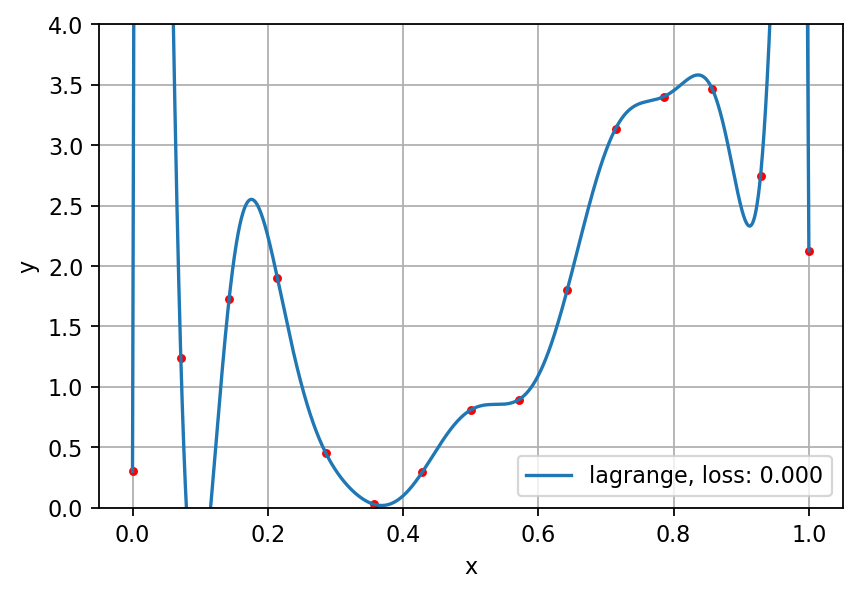

In [3]:
def f(x, k):
    return sum ( ki * x**i for i, ki in enumerate(k) )

def square_loss(z, y):
    return sum((z - y)**2)

def plot_result(x, y, k, method=''):
    loss = square_loss(f(x, k), y)
    plt.plot(x, y, '.', c='r')
    x_ = np.linspace(x[0], x[-1], 10000)
    plt.plot(x_, f(x_, k), label=f'{method}, loss: {loss:0.3f}')
    plt.xlabel('x'); plt.ylabel('y')
    plt.legend()

k = lagrange(x, y)

plot_result(x, y, k, method='lagrange')
plt.ylim([0, 4]);

## Машинное обучение

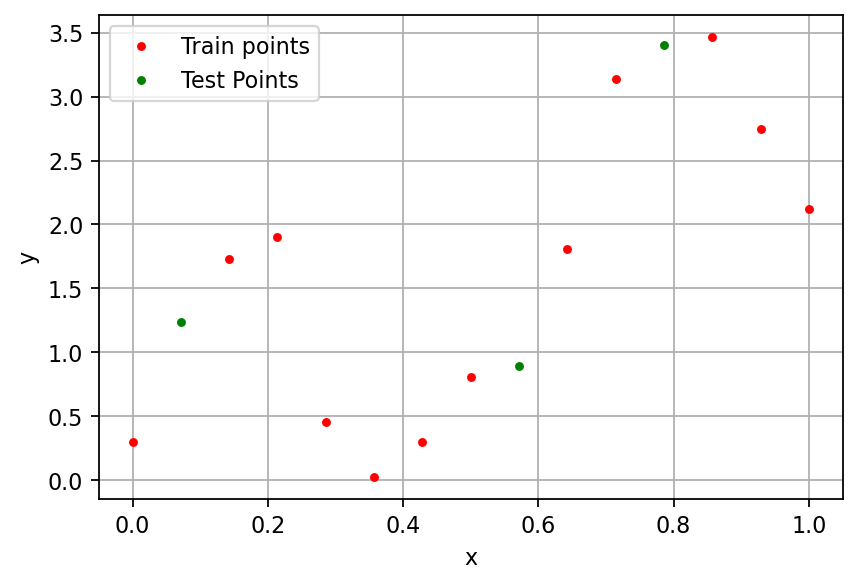

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

plt.plot(x_train, y_train, '.', c='r', label='Train points')
plt.plot(x_test, y_test, '.', c='g', label='Test Points')
plt.legend()
plt.xlabel('x'); plt.ylabel('y');

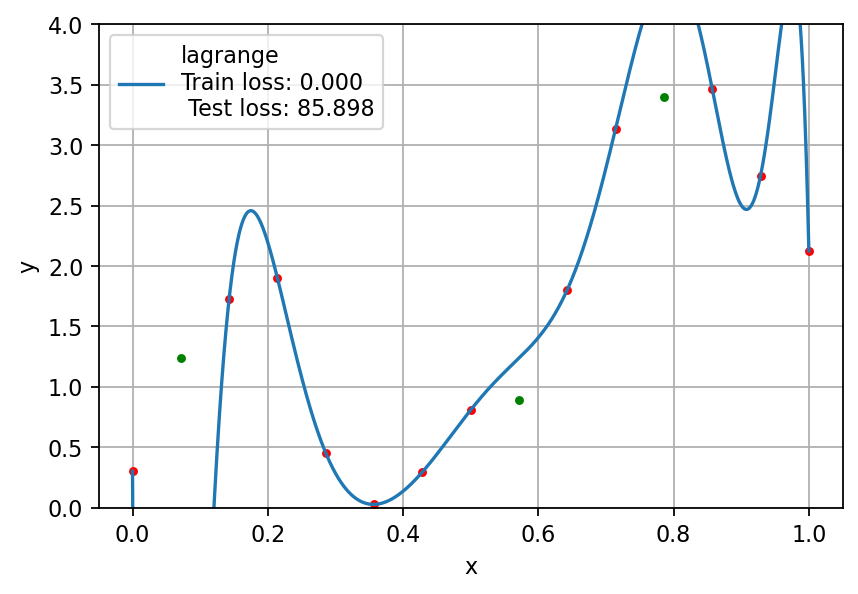

In [5]:
def plot_result_train_test(x_train, x_test, y_train, y_test, k, method=''):
    train_loss = square_loss(f(x_train, k), y_train)
    test_loss = square_loss(f(x_test, k), y_test)
    plt.plot(x_train, y_train, '.', c='r')
    plt.plot(x_test, y_test, '.', c='g')
    x_ = np.linspace(x[0], x[-1], 10000)
    plt.plot(x_, f(x_, k), label=f'{method}\nTrain loss: {train_loss:0.3f}\n Test loss: {test_loss:0.3f}')
    plt.xlabel('x'); plt.ylabel('y')
    plt.legend() 

k = lagrange(x_train, y_train)
plot_result_train_test(x_train, x_test, y_train, y_test, k, method='lagrange')
plt.ylim([0, 4]);

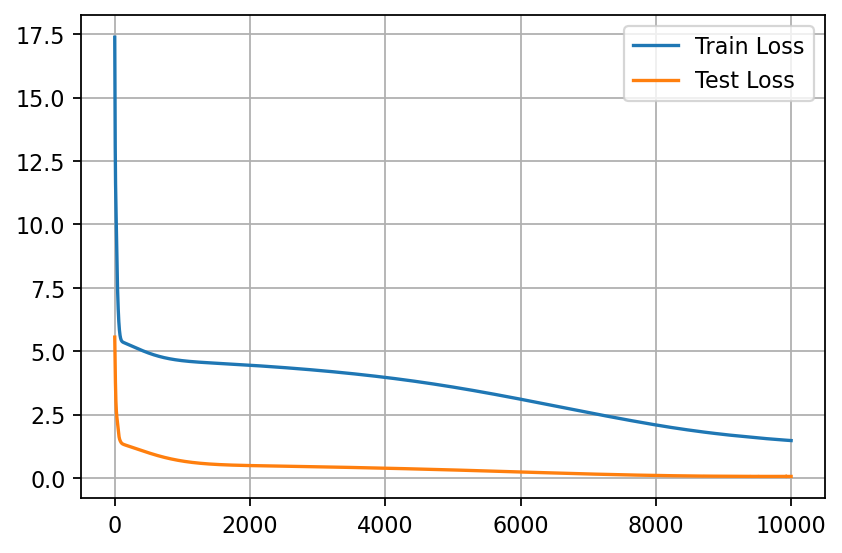

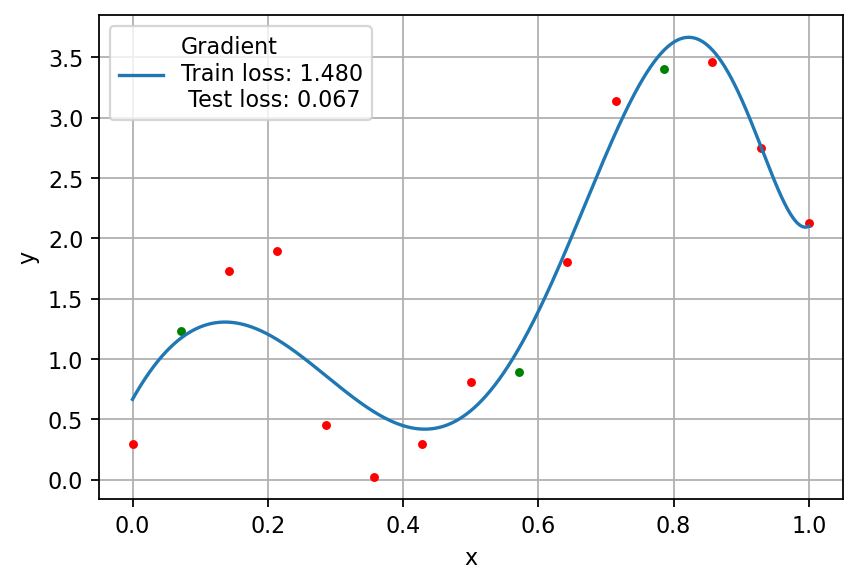

In [6]:
epoch = 10000
lr = 0.01

x_train, x_test, y_train, y_test = (torch.from_numpy(a) for a in (x_train, x_test, y_train, y_test))
k = torch.randn(len(x_train), requires_grad=True)
train_loss = []
test_loss = []
optimizer = torch.optim.Adam([k], lr=lr)

for e in range(epoch):
    optimizer.zero_grad()
    loss = square_loss(y_train, f(x_train, k))
    loss.backward()
    train_loss.append(loss.detach().numpy())
    optimizer.step()
    loss = square_loss(y_test, f(x_test, k))
    test_loss.append(loss.detach().numpy())

plt.plot(range(epoch), train_loss, label='Train Loss')
plt.plot(range(epoch), test_loss, label='Test Loss')
plt.legend()
plt.show()

plot_result_train_test(x_train, x_test, y_train, y_test, k.detach(), 'Gradient')


## Классификация ML

![](img/hard/supervised-vs-unsupervised.jpeg)

### Обучение с учителем

![supervised](img/soft/supervised-2.jpg)

#### Классификация

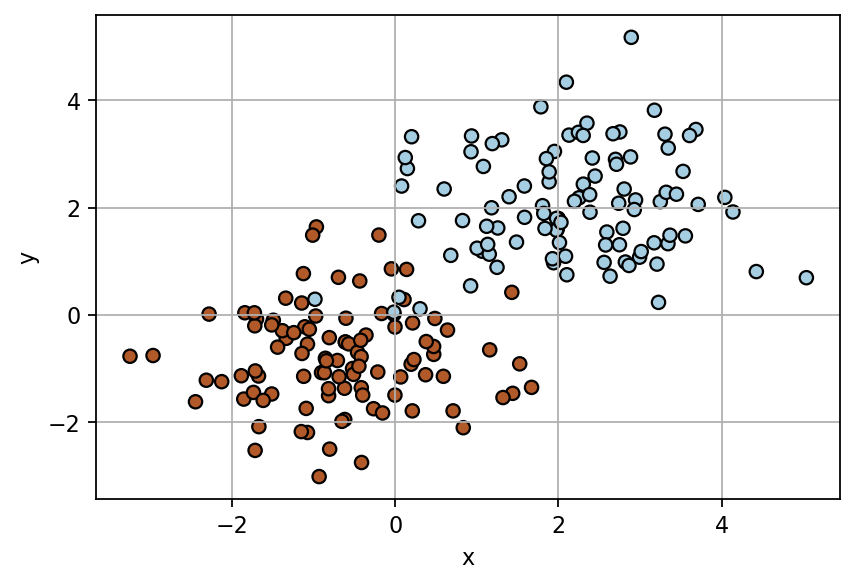

In [7]:
c1 = cluster([-0.7, -0.7])
c2 = cluster([2, 2])

X = np.vstack([c1, c2])
y = np.append(np.zeros(len(c1)), np.ones(len(c2)))

plt.scatter(X.T[0], X.T[1], c=y, cmap='Paired_r', edgecolors='k')
plt.xlabel('x'); plt.ylabel('y');

##### Логистическая регрессия

$$
f(z) = \frac{1}{1+e^{-z}}
$$
$$
z = k^T x
$$

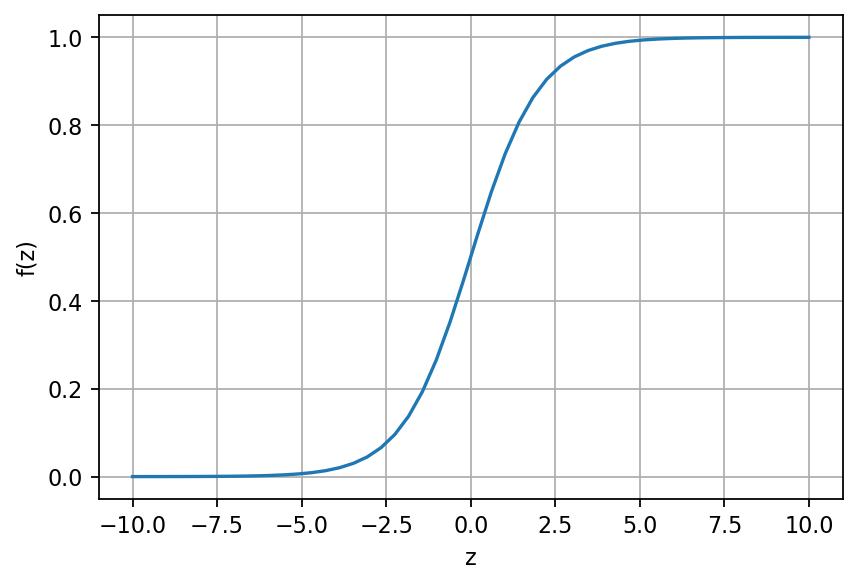

In [8]:
z = np.linspace(-10, 10)
fx = 1 / (1 + np.exp(-z))
plt.plot(z, fx)
plt.xlabel('z'); plt.ylabel('f(z)');  

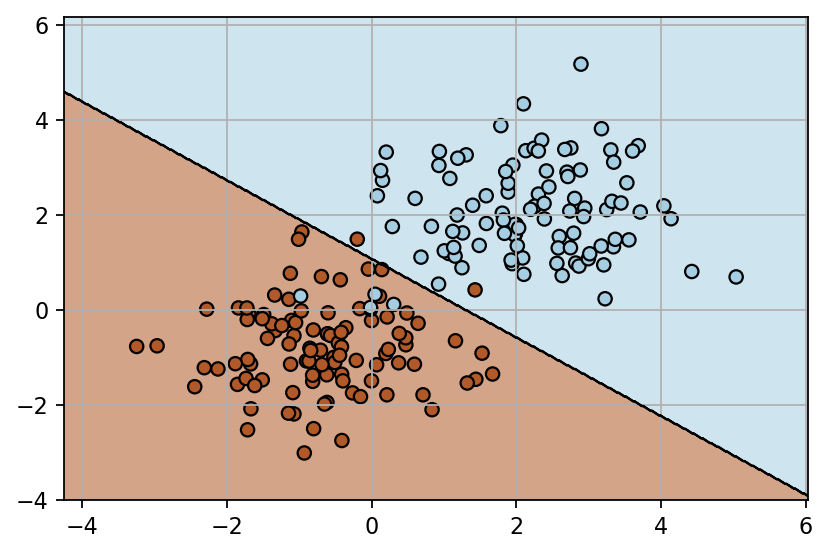

In [9]:
model = LogisticRegression()
model.fit(X, y)
 
plot_decision_boundary(model, X, y) 

##### Дерево решений
![decision_tree](img/soft/tree.png)

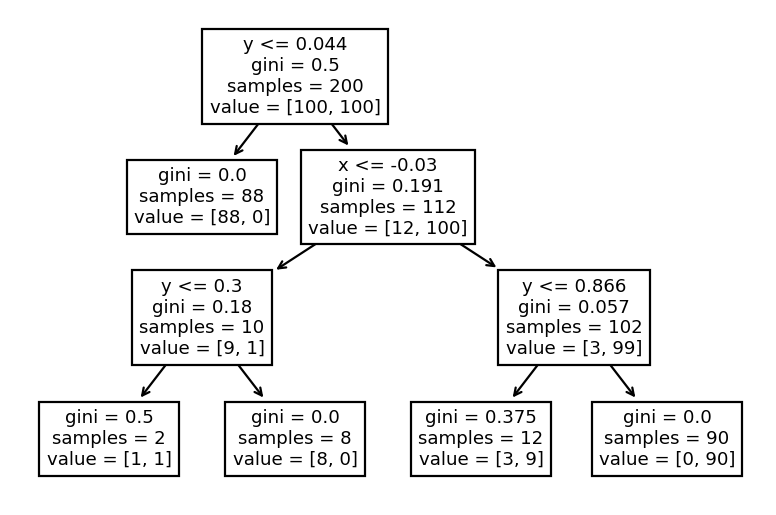

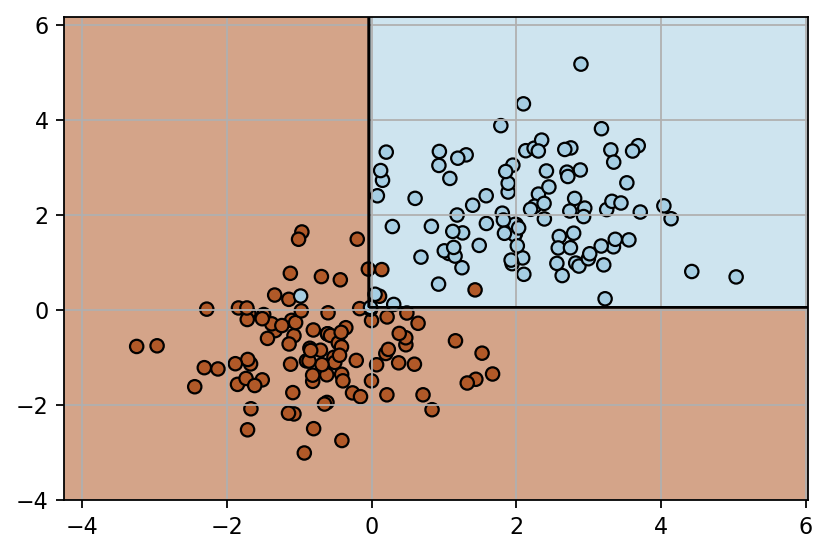

In [10]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)
plot_tree(model, feature_names=['x', 'y'])
plt.show()
plot_decision_boundary(model, X, y)

##### Метод ближайших соседей
![knearest](img/hard/knearest.png)

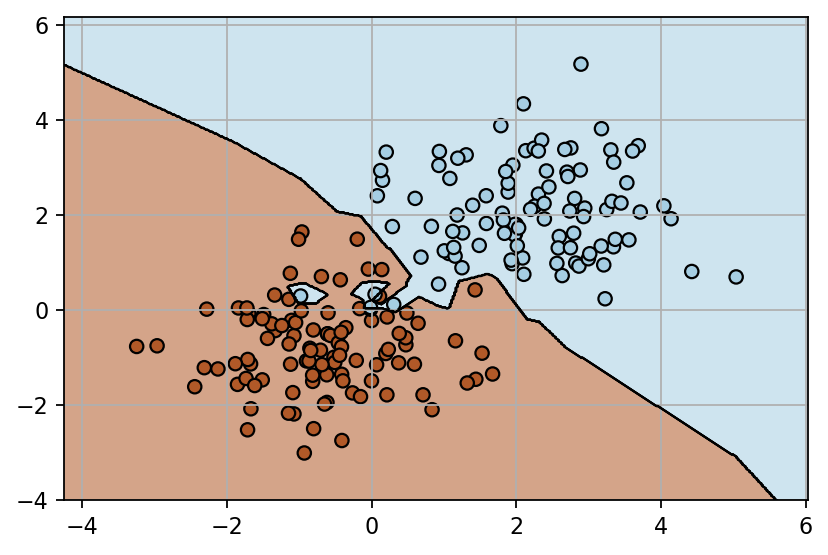

In [12]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
plot_decision_boundary(model, X, y) 

#### Регрессия

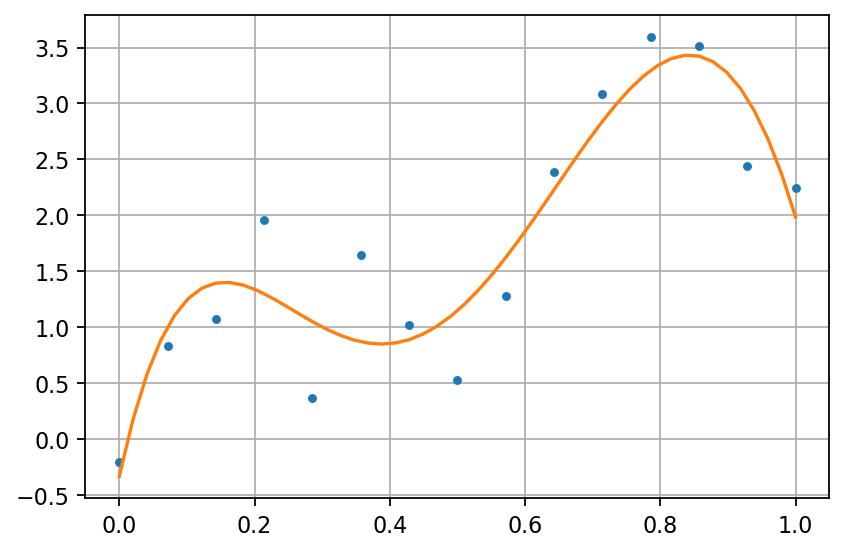

In [13]:
x, y = random_points(size=15)

poly_features = PolynomialFeatures(degree=5)
X_poly = poly_features.fit_transform(x[:, None])
model = LinearRegression()
model.fit(X_poly, y)

plt.plot(x, y, '.')
x_ = np.linspace(x[0], x[-1])
plt.plot(x_, model.predict(poly_features.transform(x_[:, None])))
plt.show()

### Обучение без учителя

![unsupervised](img/soft/unsupervised.webp)

#### Кластеризация

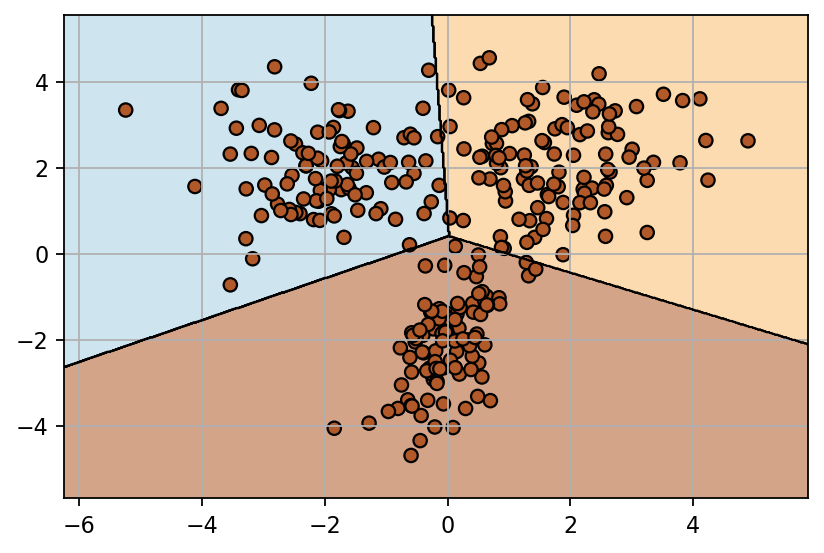

In [14]:
c1 = cluster([-2, 2])
c2 = cluster([0, -2], sigma=[[0.5, 0.5], [0, 1]])
c3 = cluster([2, 2])

x = np.vstack([c1, c2, c3])

model = KMeans(n_clusters=3)
model.fit(x)

plot_decision_boundary(model, x, np.full(len(x), 1))

## О важности признаков

### Предварительная обработка

* все:
  * Заполнение пропусков
  * Удаление аномалий

* числовые (вес, рост, возраст и т.п.):
  - Нормализация

* категориальные (пол, права, гражданство):
  - OneHot кодирование


* текстовые (описание товара, текст комментария, характеристика с работы):
  - Мешок слов
  - word2vec
  

## Метрики качества

![confusion](img/hard/confusion.png)

* Accuracy (доля правильных ответов) $\dfrac{TP + TN}{P + N}$
* Precision (точность) $\dfrac{TP}{TP+FP}$
* Recall (полнота) $\dfrac{TP}{P}$



## Ансамбли

![baging-boosting](img/hard/bagging-boosting-algorithms.ppm.png)

## Градиентный бустинг не топ?

![boosting](img/soft/boosting.png)

## Градиентный бустинг

* Scikit-Learn
* XGBoost
* LightGBM
* CatBoost

## Что в следующей серии?

![to-be-continued](img/soft/to-be-continued.png)

## Анонс

![wanted](img/soft/wanted-ds.png)

## Вопросы